In [ ]:
CAR FUEL CONSUMPTION

In [109]:
mae <- function(y,yhat) {
    mean(abs(y-yhat),na.rm=T)
}

rmse <- function(y,yhat) {
    sqrt(mean((y-yhat)^2,na.rm=T))
}

In [1]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [121]:
df <- read.csv(file="./car_fuel_comsumption.csv")

In [122]:
head(df)

car,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill.liters
1,28.0,5.0,26,21.5,12,,E10,0,0,0,45
2,12.0,4.2,30,21.5,13,,E10,0,0,0,NA
3,11.2,5.5,38,21.5,15,,E10,0,0,0,NA
4,12.9,3.9,36,21.5,14,,E10,0,0,0,NA
5,18.5,4.5,46,21.5,15,,E10,0,0,0,NA
6,8.3,6.4,50,21.5,10,,E10,0,0,0,NA


In [123]:
dim(df)

[1] 361  12

In [124]:
df$AC <- factor(df$AC)
df$rain <- factor(df$rain)
df$sun <- factor(df$rain)

In [125]:
df$refill.liters <- NULL

In [126]:
summary(df)

      car         distance        consume          speed        temp_inside   
 Min.   :  1   Min.   : 2.00   Min.   :3.300   Min.   :16.00   Min.   :19.00  
 1st Qu.: 91   1st Qu.:11.80   1st Qu.:4.300   1st Qu.:33.00   1st Qu.:21.50  
 Median :181   Median :14.30   Median :4.700   Median :40.00   Median :22.00  
 Mean   :181   Mean   :16.38   Mean   :4.779   Mean   :41.01   Mean   :21.93  
 3rd Qu.:271   3rd Qu.:18.40   3rd Qu.:5.200   3rd Qu.:49.00   3rd Qu.:22.50  
 Max.   :361   Max.   :48.60   Max.   :6.900   Max.   :80.00   Max.   :25.50  
                                                               NA's   :12     
  temp_outside      specials   gas_type   AC      rain    sun    
 Min.   :-5.00          :275   E10 :145   0:335   0:318   0:318  
 1st Qu.: 7.00   rain   : 30   SP98:216   1: 26   1: 43   1: 43  
 Median :10.00   sun    : 26                                     
 Mean   :11.41   AC rain:  8                                     
 3rd Qu.:16.00   ac     :  7          

In [127]:
ftable(AC=df$AC, rain=df$rain, sun=df$sun)

        sun   0   1
AC rain            
0  0        301   0
   1          0  34
1  0         17   0
   1          0   9

In [128]:
df$AC_rain_sun <- case_when(df$AC == 0 & df$rain==0 & df$sun==0 ~ 1,
                            df$AC == 0 & df$rain==1 & df$sun==1 ~ 2,
                            df$AC == 1 & df$rain==0 & df$sun==0~ 3,
                           TRUE ~ 4)
df$AC_rain_sun <- factor(df$AC_rain_sun)
table(df$AC_rain_sun)


  1   2   3   4 
301  34  17   9 

In [129]:
mm <- mechkar::getMissingness(df,getRows=T)

[[1]]
          var na_count rate
1 temp_inside       12  3.3

[[2]]
[1] "This dataset has 349 (96.7%) complete rows. Original data has 361 rows."



In [131]:
df <- df[mm$rows,]

In [ ]:
1

In [64]:
library(ggplot2)

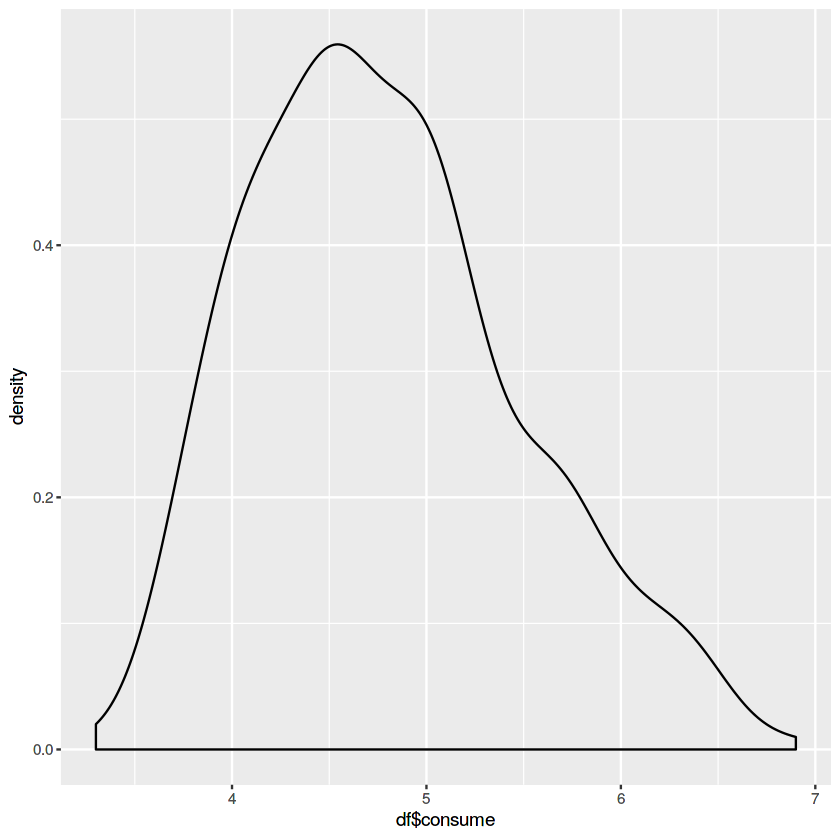

In [132]:
ggplot(data=df) +
    geom_density(aes(x=df$consume))

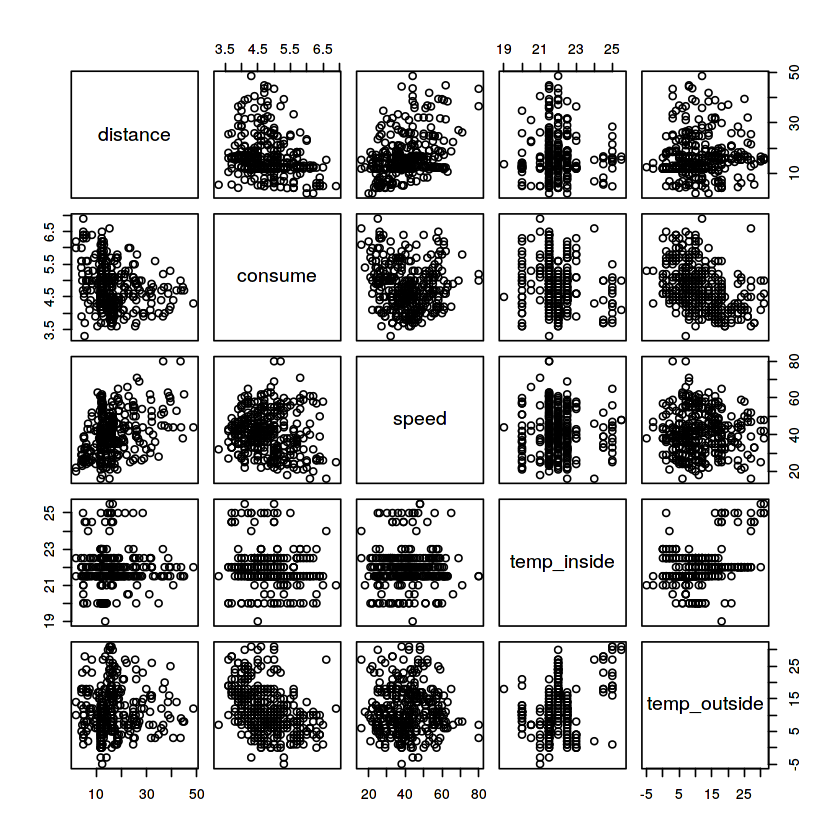

In [69]:
pairs(df[,2:6])

In [136]:
names(df)

[1] "car"          "distance"     "consume"      "speed"        "temp_inside" 
 [6] "temp_outside" "specials"     "gas_type"     "AC"           "rain"        
[11] "sun"          "AC_rain_sun"

In [139]:
mod1 <- lm(consume ~. , data=df[,c(2:6,8)])
summary(mod1)
pred <- predict(mod1)
mae(df$consume, pred)
rmse(df$consume, pred)


Call:
lm(formula = consume ~ ., data = df[, c(2:6, 8)])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.87185 -0.48094 -0.04637  0.42446  2.31840 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.871082   0.751028   7.817 6.69e-14 ***
distance     -0.016135   0.004277  -3.772 0.000191 ***
speed        -0.004412   0.003051  -1.446 0.148996    
temp_inside  -0.008150   0.034631  -0.235 0.814090    
temp_outside -0.039037   0.005060  -7.715 1.33e-13 ***
gas_typeSP98 -0.022429   0.067945  -0.330 0.741515    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6117 on 343 degrees of freedom
Multiple R-squared:  0.2256,	Adjusted R-squared:  0.2143 
F-statistic: 19.98 on 5 and 343 DF,  p-value: < 2.2e-16


[1] 0.4904956

[1] 0.6063987

In [140]:
mod1 <- lm(consume ~. , data=df[,c(2:6,8,12)])
summary(mod1)
pred <- predict(mod1)
mae(df$consume, pred)
rmse(df$consume, pred)


Call:
lm(formula = consume ~ ., data = df[, c(2:6, 8, 12)])

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7964 -0.4492 -0.0310  0.4281  2.0757 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.479738   0.777791   8.331 2.00e-15 ***
distance     -0.016466   0.004171  -3.947 9.61e-05 ***
speed        -0.004668   0.002979  -1.567   0.1180    
temp_inside  -0.038427   0.035841  -1.072   0.2844    
temp_outside -0.036593   0.005067  -7.222 3.37e-12 ***
gas_typeSP98 -0.062730   0.066903  -0.938   0.3491    
AC_rain_sun2  0.442272   0.111471   3.968 8.86e-05 ***
AC_rain_sun3  0.344204   0.165144   2.084   0.0379 *  
AC_rain_sun4  0.334919   0.202488   1.654   0.0990 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5962 on 340 degrees of freedom
Multiple R-squared:  0.2708,	Adjusted R-squared:  0.2536 
F-statistic: 15.78 on 8 and 340 DF,  p-value: < 2.2e-16


[1] 0.4751801

[1] 0.5884373

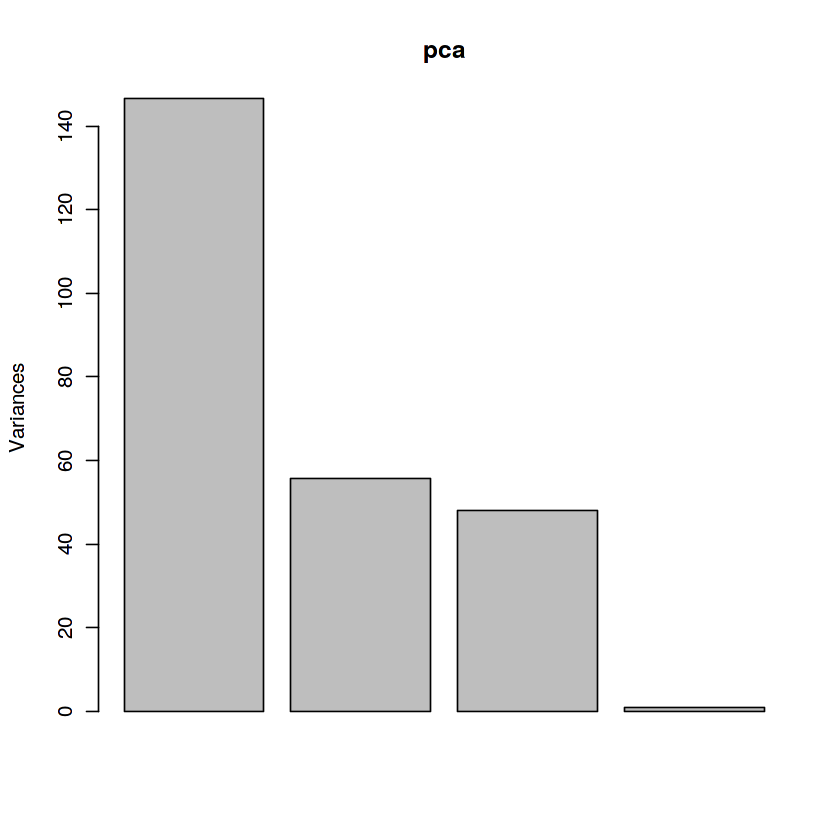

In [141]:
pca <- prcomp(df[,c(2,4,5,6)])
plot(pca)


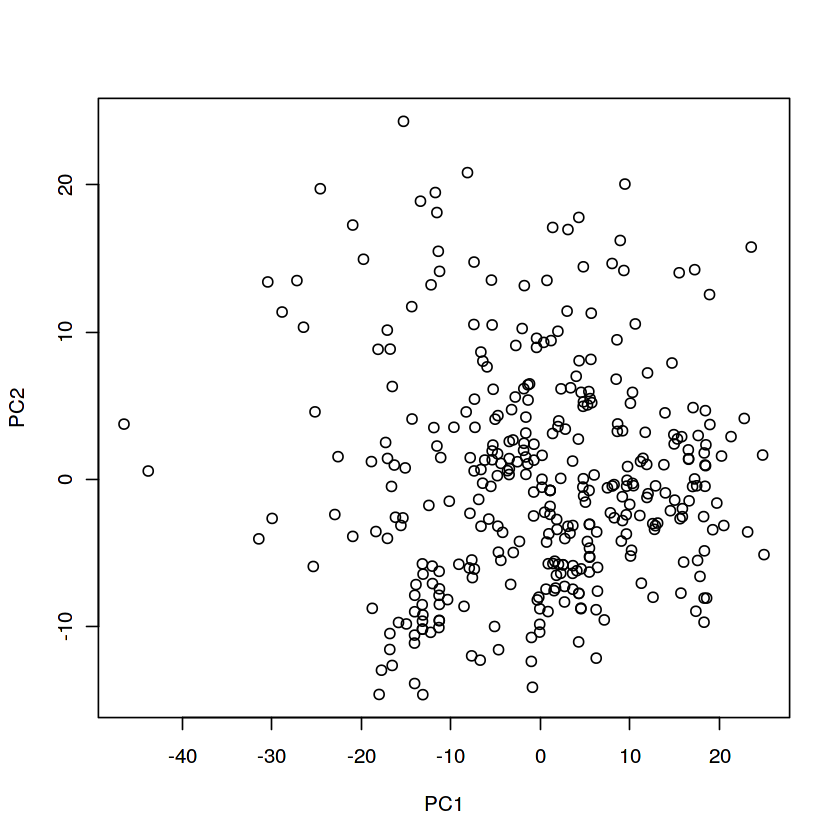

In [142]:
plot(pca$x)

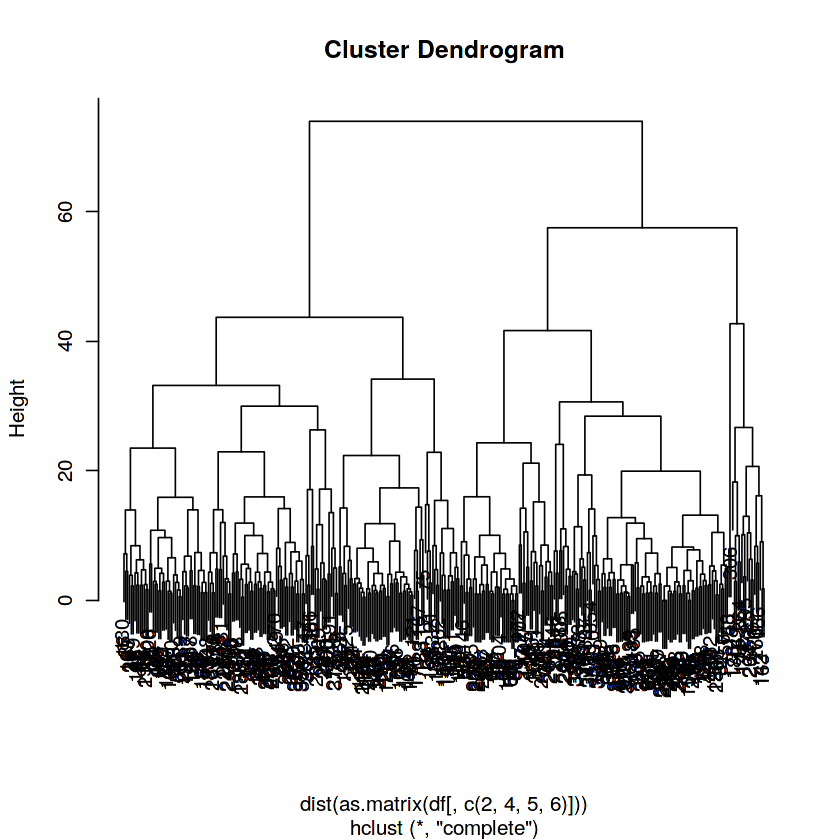

In [143]:
hcl <- hclust(dist(as.matrix(df[,c(2,4,5,6)])))
plot(hcl)

In [144]:
clusters <- cutree(hcl,3)
table(clusters)

clusters
  1   2   3 
183 146  20 

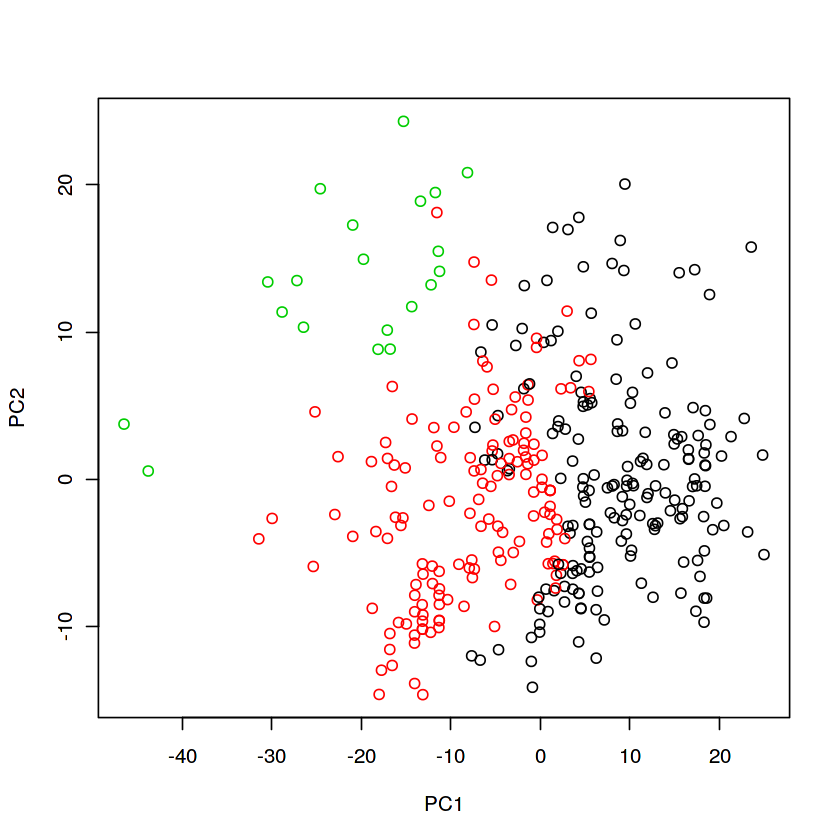

In [145]:
plot(pca$x, col=clusters)

In [146]:
df$cluster <- factor(clusters)
summary(df)

      car           distance        consume          speed      
 Min.   :  1.0   Min.   : 2.00   Min.   :3.300   Min.   :16.00  
 1st Qu.: 88.0   1st Qu.:11.80   1st Qu.:4.300   1st Qu.:33.00  
 Median :182.0   Median :14.30   Median :4.700   Median :40.00  
 Mean   :182.2   Mean   :16.42   Mean   :4.789   Mean   :41.01  
 3rd Qu.:274.0   3rd Qu.:18.40   3rd Qu.:5.200   3rd Qu.:49.00  
 Max.   :361.0   Max.   :48.60   Max.   :6.900   Max.   :80.00  
                                                                
  temp_inside     temp_outside      specials   gas_type   AC      rain   
 Min.   :19.00   Min.   :-5.00          :265   E10 :142   0:323   0:307  
 1st Qu.:21.50   1st Qu.: 7.00   rain   : 29   SP98:207   1: 26   1: 42  
 Median :22.00   Median :10.00   sun    : 25                             
 Mean   :21.93   Mean   :11.39   AC rain:  8                             
 3rd Qu.:22.50   3rd Qu.:16.00   ac     :  7                             
 Max.   :25.50   Max.   :31.00   AC 

In [147]:
names(df)

[1] "car"          "distance"     "consume"      "speed"        "temp_inside" 
 [6] "temp_outside" "specials"     "gas_type"     "AC"           "rain"        
[11] "sun"          "AC_rain_sun"  "cluster"

In [150]:
mod2 <- lm(consume ~. , data=df[,c(2:6,8,12:13)])
summary(mod2)
pred2 <- predict(mod2)
mae(df$consume, pred2)
rmse(df$consume, pred2)


Call:
lm(formula = consume ~ ., data = df[, c(2:6, 8, 12:13)])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.89315 -0.44473 -0.02232  0.39165  2.06899 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.4897420  0.7728075   8.398 1.27e-15 ***
distance     -0.0260448  0.0054621  -4.768 2.77e-06 ***
speed         0.0003099  0.0045129   0.069   0.9453    
temp_inside  -0.0406515  0.0355583  -1.143   0.2538    
temp_outside -0.0333326  0.0054133  -6.158 2.10e-09 ***
gas_typeSP98 -0.0585357  0.0662399  -0.884   0.3775    
AC_rain_sun2  0.4346806  0.1103847   3.938 9.99e-05 ***
AC_rain_sun3  0.3689516  0.1637332   2.253   0.0249 *  
AC_rain_sun4  0.3574504  0.2005340   1.782   0.0756 .  
cluster2     -0.1641723  0.1047047  -1.568   0.1178    
cluster3      0.3472139  0.2080950   1.669   0.0961 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.59 on 338 degrees of freedom
Multiple R-squared:  

[1] 0.4661193

[1] 0.5806163

In [151]:
df$delta_temp <- df$temp_outside - df$temp_inside
summary(df)

      car           distance        consume          speed      
 Min.   :  1.0   Min.   : 2.00   Min.   :3.300   Min.   :16.00  
 1st Qu.: 88.0   1st Qu.:11.80   1st Qu.:4.300   1st Qu.:33.00  
 Median :182.0   Median :14.30   Median :4.700   Median :40.00  
 Mean   :182.2   Mean   :16.42   Mean   :4.789   Mean   :41.01  
 3rd Qu.:274.0   3rd Qu.:18.40   3rd Qu.:5.200   3rd Qu.:49.00  
 Max.   :361.0   Max.   :48.60   Max.   :6.900   Max.   :80.00  
                                                                
  temp_inside     temp_outside      specials   gas_type   AC      rain   
 Min.   :19.00   Min.   :-5.00          :265   E10 :142   0:323   0:307  
 1st Qu.:21.50   1st Qu.: 7.00   rain   : 29   SP98:207   1: 26   1: 42  
 Median :22.00   Median :10.00   sun    : 25                             
 Mean   :21.93   Mean   :11.39   AC rain:  8                             
 3rd Qu.:22.50   3rd Qu.:16.00   ac     :  7                             
 Max.   :25.50   Max.   :31.00   AC 

In [152]:
#mod3 <- lm(consume ~. , data=df[,c(2:3,5:8,12:13)])
mod3 <- lm(consume ~. , data=df[,c(2:6,8,12:14)])
summary(mod3)
pred3 <- predict(mod3)
mae(df$consume, pred3)
rmse(df$consume, pred3)


Call:
lm(formula = consume ~ ., data = df[, c(2:6, 8, 12:14)])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.89315 -0.44473 -0.02232  0.39165  2.06899 

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.4897420  0.7728075   8.398 1.27e-15 ***
distance     -0.0260448  0.0054621  -4.768 2.77e-06 ***
speed         0.0003099  0.0045129   0.069   0.9453    
temp_inside  -0.0406515  0.0355583  -1.143   0.2538    
temp_outside -0.0333326  0.0054133  -6.158 2.10e-09 ***
gas_typeSP98 -0.0585357  0.0662399  -0.884   0.3775    
AC_rain_sun2  0.4346806  0.1103847   3.938 9.99e-05 ***
AC_rain_sun3  0.3689516  0.1637332   2.253   0.0249 *  
AC_rain_sun4  0.3574504  0.2005340   1.782   0.0756 .  
cluster2     -0.1641723  0.1047047  -1.568   0.1178    
cluster3      0.3472139  0.2080950   1.669   0.0961 .  
delta_temp           NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 

[1] 0.4661193

[1] 0.5806163

In [153]:
df$time <- df$distance / df$speed
summary(df)

      car           distance        consume          speed      
 Min.   :  1.0   Min.   : 2.00   Min.   :3.300   Min.   :16.00  
 1st Qu.: 88.0   1st Qu.:11.80   1st Qu.:4.300   1st Qu.:33.00  
 Median :182.0   Median :14.30   Median :4.700   Median :40.00  
 Mean   :182.2   Mean   :16.42   Mean   :4.789   Mean   :41.01  
 3rd Qu.:274.0   3rd Qu.:18.40   3rd Qu.:5.200   3rd Qu.:49.00  
 Max.   :361.0   Max.   :48.60   Max.   :6.900   Max.   :80.00  
                                                                
  temp_inside     temp_outside      specials   gas_type   AC      rain   
 Min.   :19.00   Min.   :-5.00          :265   E10 :142   0:323   0:307  
 1st Qu.:21.50   1st Qu.: 7.00   rain   : 29   SP98:207   1: 26   1: 42  
 Median :22.00   Median :10.00   sun    : 25                             
 Mean   :21.93   Mean   :11.39   AC rain:  8                             
 3rd Qu.:22.50   3rd Qu.:16.00   ac     :  7                             
 Max.   :25.50   Max.   :31.00   AC 

In [155]:
mod4 <- lm(consume ~. , data=df[,c(2:6,8,12:13,15)])
summary(mod4)
pred4 <- predict(mod4)
mae(df$consume, pred4)
rmse(df$consume, pred4)


Call:
lm(formula = consume ~ ., data = df[, c(2:6, 8, 12:13, 15)])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.84345 -0.44078 -0.02606  0.40607  1.69015 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.872953   0.820980   7.154 5.30e-12 ***
distance     -0.061317   0.017352  -3.534 0.000467 ***
speed         0.014036   0.007828   1.793 0.073859 .  
temp_inside  -0.035761   0.035445  -1.009 0.313736    
temp_outside -0.032949   0.005388  -6.115 2.67e-09 ***
gas_typeSP98 -0.061223   0.065904  -0.929 0.353567    
AC_rain_sun2  0.418415   0.110067   3.801 0.000171 ***
AC_rain_sun3  0.351554   0.163075   2.156 0.031808 *  
AC_rain_sun4  0.325168   0.200049   1.625 0.105004    
cluster2     -0.184004   0.104566  -1.760 0.079366 .  
cluster3      0.544645   0.226623   2.403 0.016787 *  
time          1.263299   0.590216   2.140 0.033040 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.586

[1] 0.4692024

[1] 0.5767095

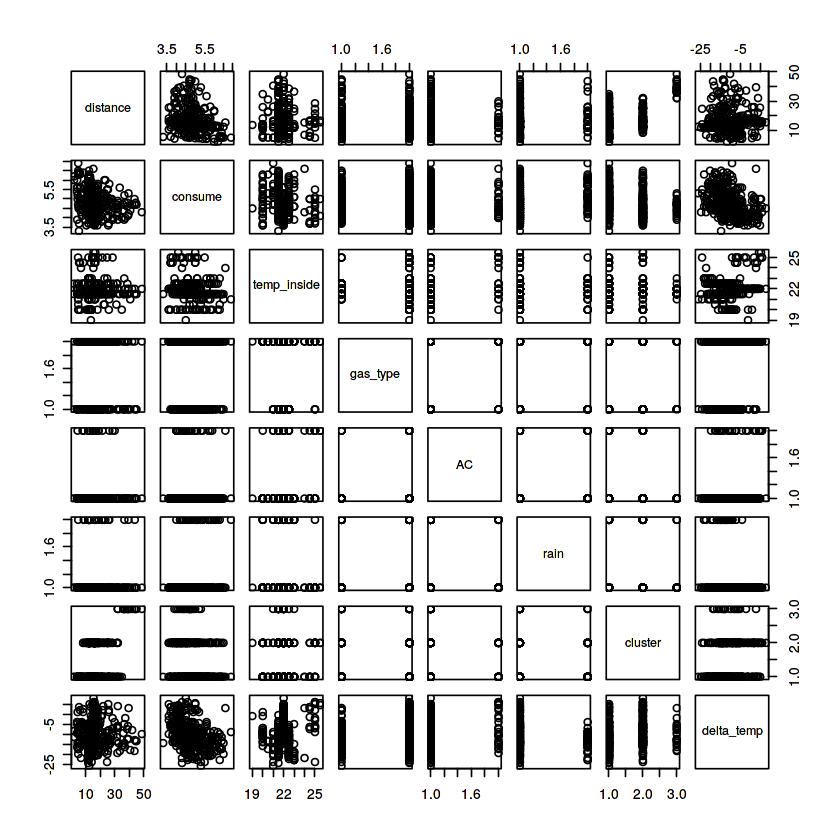

In [83]:
pairs(df[,c(2,3,5,8:10,12:13)])


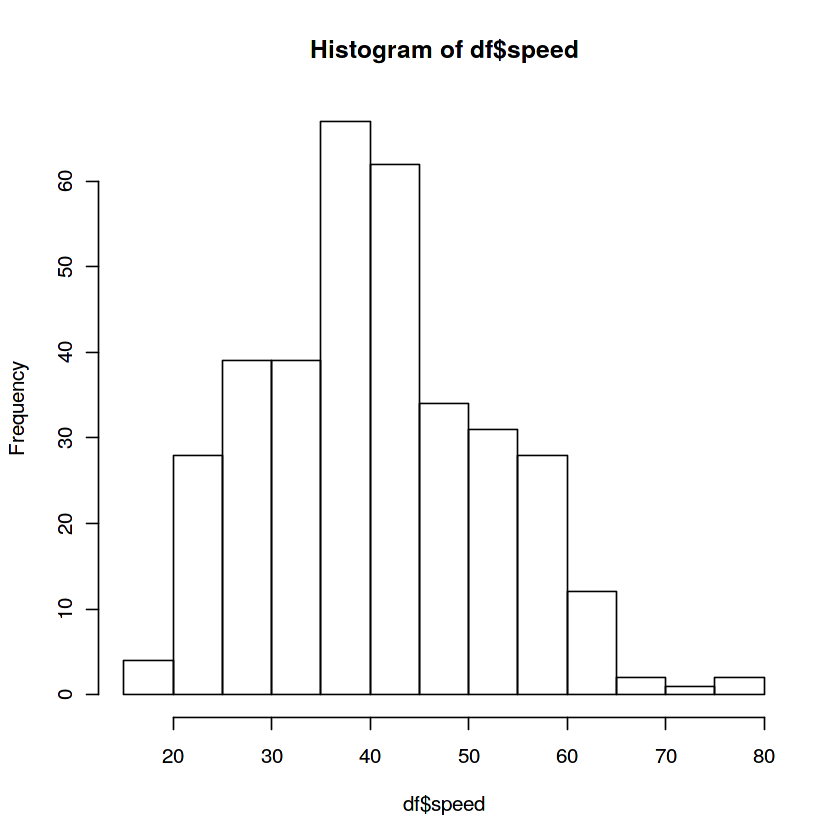

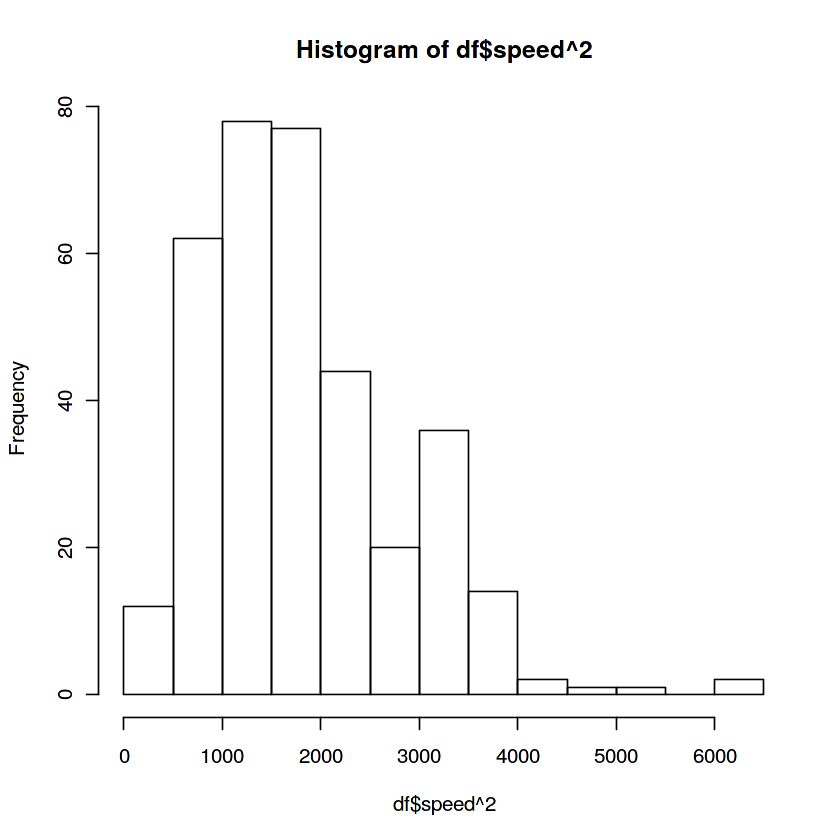

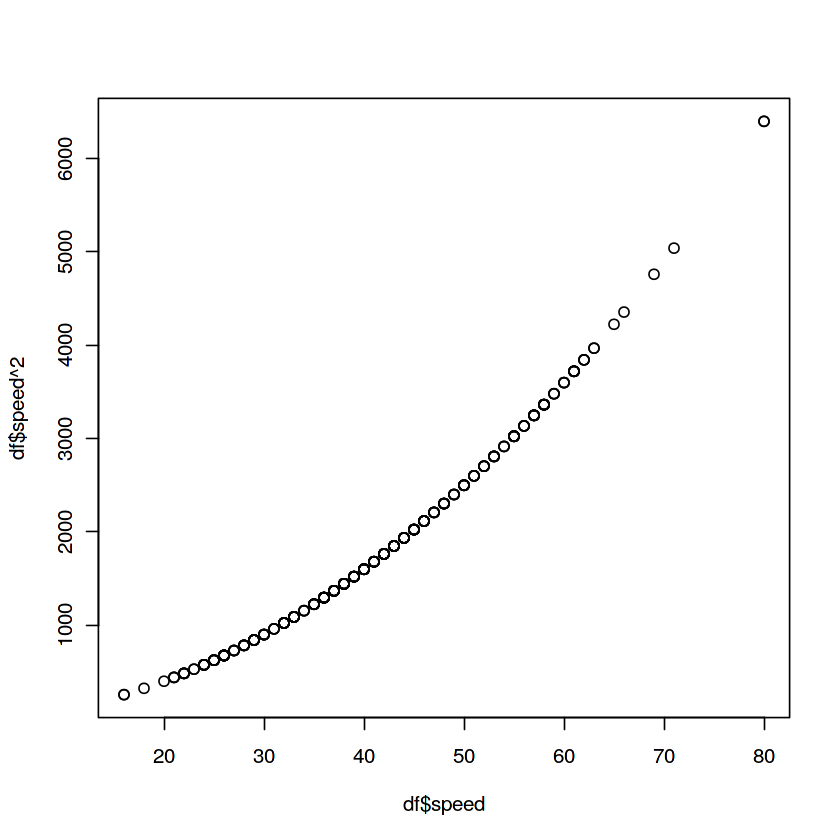

In [156]:
hist(df$speed)
hist(df$speed^2)
plot(df$speed^2 ~ df$speed)

In [157]:
df$speed_sqr <- df$speed^2
summary(df)

      car           distance        consume          speed      
 Min.   :  1.0   Min.   : 2.00   Min.   :3.300   Min.   :16.00  
 1st Qu.: 88.0   1st Qu.:11.80   1st Qu.:4.300   1st Qu.:33.00  
 Median :182.0   Median :14.30   Median :4.700   Median :40.00  
 Mean   :182.2   Mean   :16.42   Mean   :4.789   Mean   :41.01  
 3rd Qu.:274.0   3rd Qu.:18.40   3rd Qu.:5.200   3rd Qu.:49.00  
 Max.   :361.0   Max.   :48.60   Max.   :6.900   Max.   :80.00  
                                                                
  temp_inside     temp_outside      specials   gas_type   AC      rain   
 Min.   :19.00   Min.   :-5.00          :265   E10 :142   0:323   0:307  
 1st Qu.:21.50   1st Qu.: 7.00   rain   : 29   SP98:207   1: 26   1: 42  
 Median :22.00   Median :10.00   sun    : 25                             
 Mean   :21.93   Mean   :11.39   AC rain:  8                             
 3rd Qu.:22.50   3rd Qu.:16.00   ac     :  7                             
 Max.   :25.50   Max.   :31.00   AC 

In [158]:
mod5 <- lm(consume ~. , data=df[,c(2:6,8,12:13,16)])
summary(mod5)
pred5 <- predict(mod5)
mae(df$consume, pred5)
rmse(df$consume, pred5)


Call:
lm(formula = consume ~ ., data = df[, c(2:6, 8, 12:13, 16)])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.84515 -0.40852 -0.01929  0.37225  1.54698 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.2129607  0.7734517  10.619  < 2e-16 ***
distance     -0.0238362  0.0051576  -4.622 5.43e-06 ***
speed        -0.1048910  0.0164742  -6.367 6.31e-10 ***
temp_inside  -0.0229842  0.0336118  -0.684 0.494562    
temp_outside -0.0345116  0.0051039  -6.762 6.03e-11 ***
gas_typeSP98 -0.0684534  0.0624336  -1.096 0.273678    
AC_rain_sun2  0.3745427  0.1044087   3.587 0.000384 ***
AC_rain_sun3  0.3202499  0.1544559   2.073 0.038894 *  
AC_rain_sun4  0.1265272  0.1921587   0.658 0.510698    
cluster2     -0.0607359  0.0998929  -0.608 0.543591    
cluster3      0.2340958  0.1968260   1.189 0.235138    
speed_sqr     0.0011930  0.0001805   6.610 1.51e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard

[1] 0.4464084

[1] 0.5462843